In [1]:
import pandas as pd

In [23]:
df = pd.read_csv('./data/diabetes_012_health_indicators_BRFSS2015.csv')
df.columns.to_list()

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [24]:
df.drop(columns=['Education', 'Income', 'NoDocbcCost', 'AnyHealthcare'], inplace=True)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


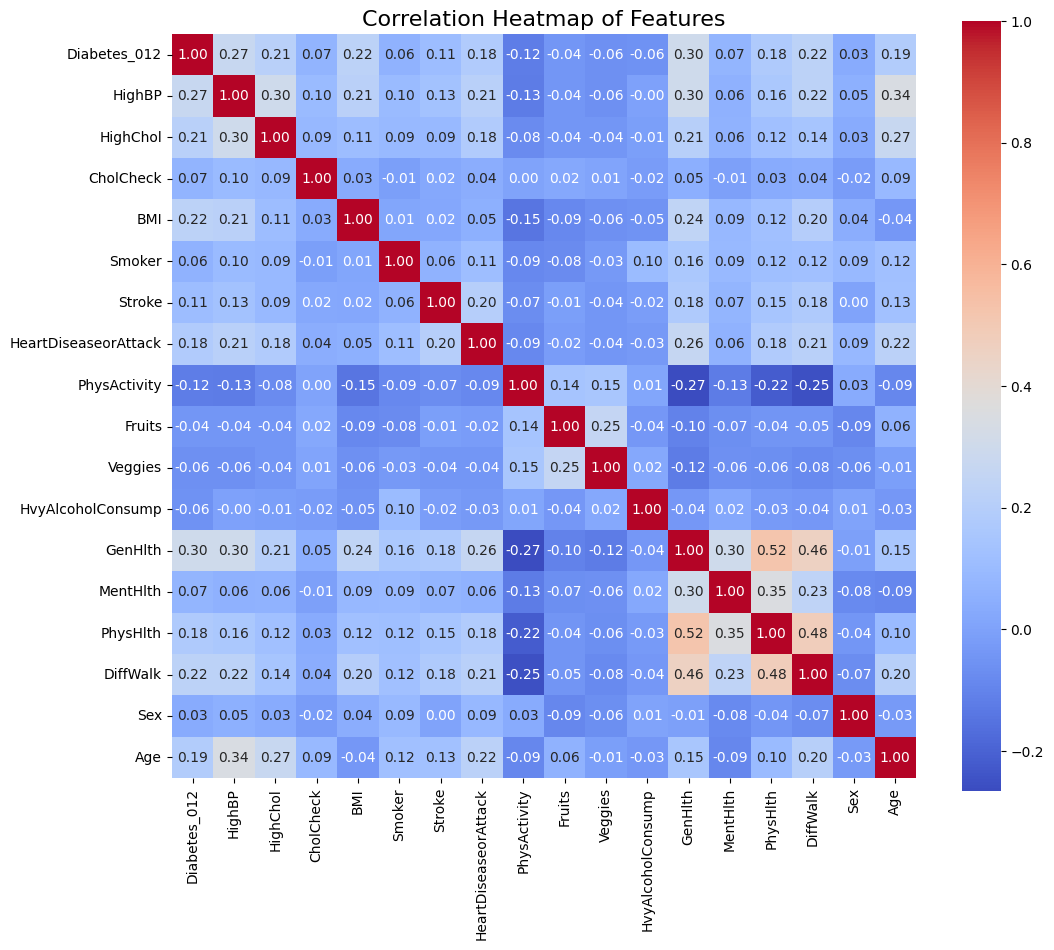

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title
plt.title("Correlation Heatmap of Features", fontsize=16)

# Show the plot
plt.show()

The directly related fields are = HighBP, HighChol, Age, DiffWalk, GeneralHealth, BMI
<br>
The inversely related field are = PhysActivity, Veggies

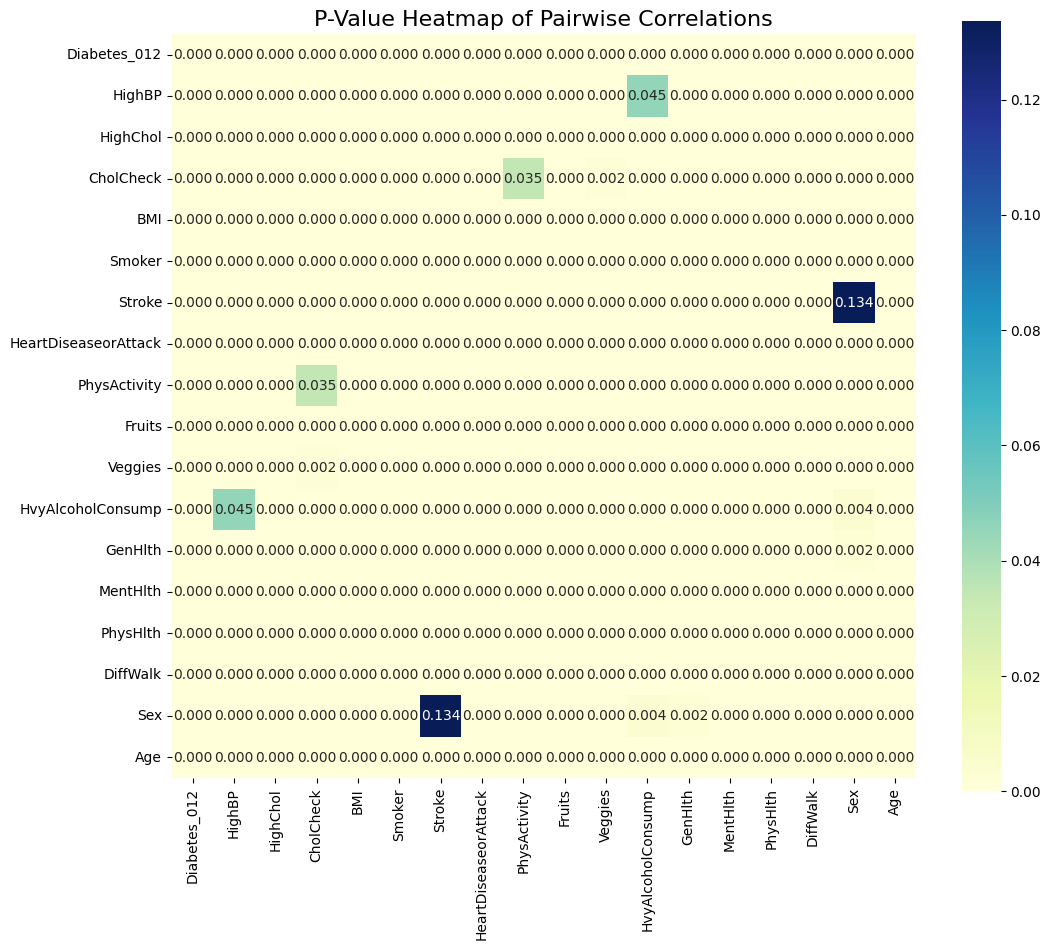

In [28]:
from scipy.stats import pearsonr

# Function to calculate correlation matrix and p-value matrix
def calculate_corr_pvalues(df):
    numeric_df = df.select_dtypes(include=[np.number])
    cols = numeric_df.columns
    pval_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                _, pval = pearsonr(numeric_df[cols[i]], numeric_df[cols[j]])
                pval_matrix.iloc[i, j] = pval
            else:
                pval_matrix.iloc[i, j] = 0  # p-value with itself is 0
    return pval_matrix

# Compute p-values
p_values = calculate_corr_pvalues(df)

# Plot heatmap of p-values
plt.figure(figsize=(12, 10))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True, square=True)
plt.title("P-Value Heatmap of Pairwise Correlations", fontsize=16)
plt.show()

                Fruits   Veggies
Diabetes_012                    
0.0           0.643023  0.821439
1.0           0.602246  0.768948
2.0           0.585441  0.756408


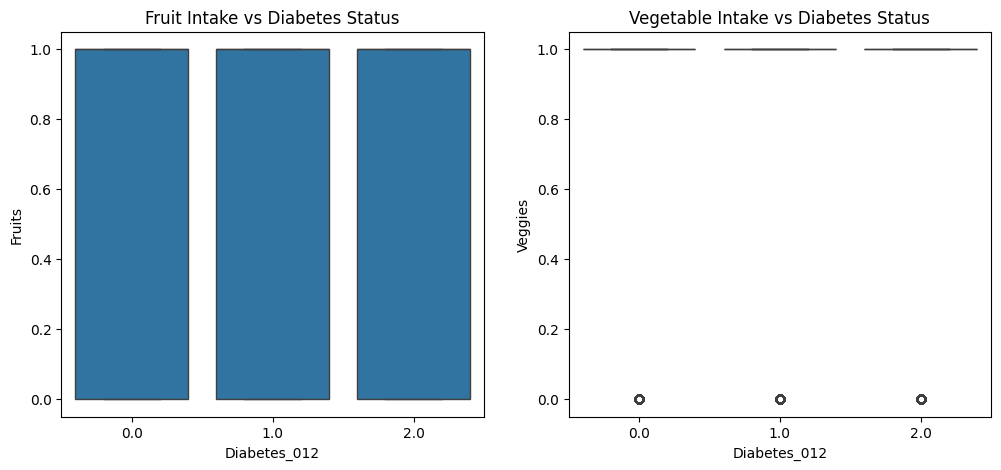

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset

# Group by Diabetes_012 and calculate average fruit and vegetable intake
fruit_veggies_summary = df.groupby('Diabetes_012')[['Fruits', 'Veggies']].mean()
print(fruit_veggies_summary)

# Alternatively, visualize the relationship with a boxplot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Diabetes_012', y='Fruits', data=df)
plt.title('Fruit Intake vs Diabetes Status')

plt.subplot(1,2,2)
sns.boxplot(x='Diabetes_012', y='Veggies', data=df)
plt.title('Vegetable Intake vs Diabetes Status')

plt.show()


In [30]:
import statsmodels.api as sm

# Select predictors
X = df[['Fruits', 'Veggies']]
y = df['Diabetes_012']

# Add constant
X = sm.add_constant(X)

# Fit multinomial logistic regression
model = sm.MNLogit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.490090
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:           Diabetes_012   No. Observations:               253680
Model:                        MNLogit   Df Residuals:                   253674
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Jan 2026   Pseudo R-squ.:                0.004193
Time:                        10:38:15   Log-Likelihood:            -1.2433e+05
converged:                       True   LL-Null:                   -1.2485e+05
Covariance Type:            nonrobust   LLR p-value:                2.274e-225
Diabetes_012=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.5323      0.033   -106.925      0.000      -3.597      -3.468
Fruits           

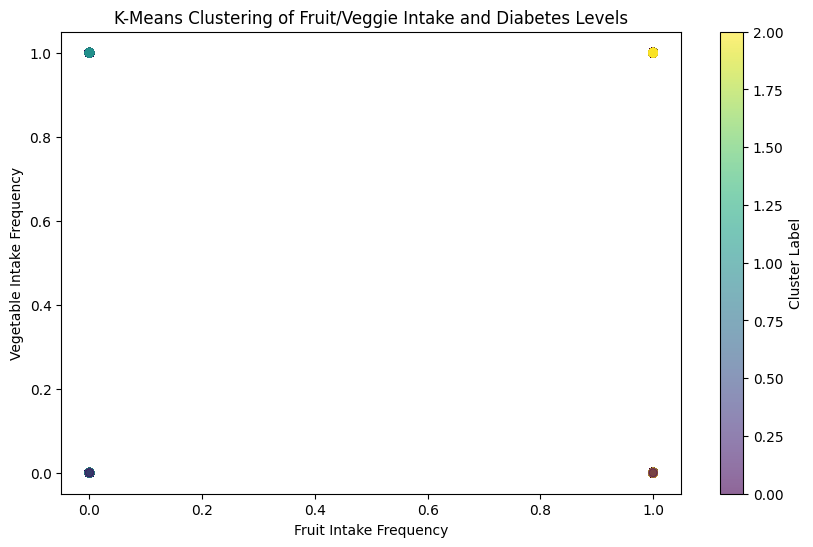

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select variables for clustering
X = df[['Fruits', 'Veggies', 'Diabetes_012']].copy()

# Scale data (important!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans with 3 clusters (you can try 2–5)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Plot clusters using Fruits vs Veggies
plt.figure(figsize=(10,6))
plt.scatter(df['Fruits'], df['Veggies'], c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.xlabel("Fruit Intake Frequency")
plt.ylabel("Vegetable Intake Frequency")
plt.title("K-Means Clustering of Fruit/Veggie Intake and Diabetes Levels")

plt.colorbar(label='Cluster Label')
plt.show()


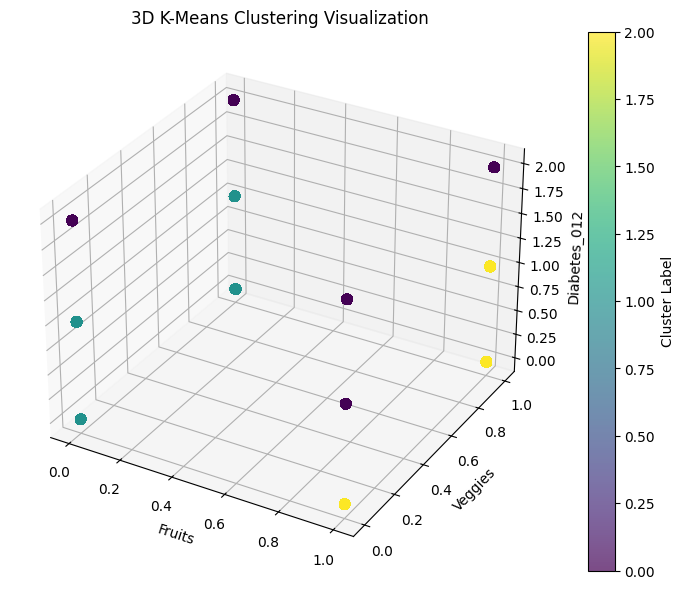

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['Fruits'], 
    df['Veggies'], 
    df['Diabetes_012'], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=50, 
    alpha=0.7
)

ax.set_xlabel('Fruits')
ax.set_ylabel('Veggies')
ax.set_zlabel('Diabetes_012')
ax.set_title('3D K-Means Clustering Visualization')

plt.colorbar(sc, label='Cluster Label')
plt.show()


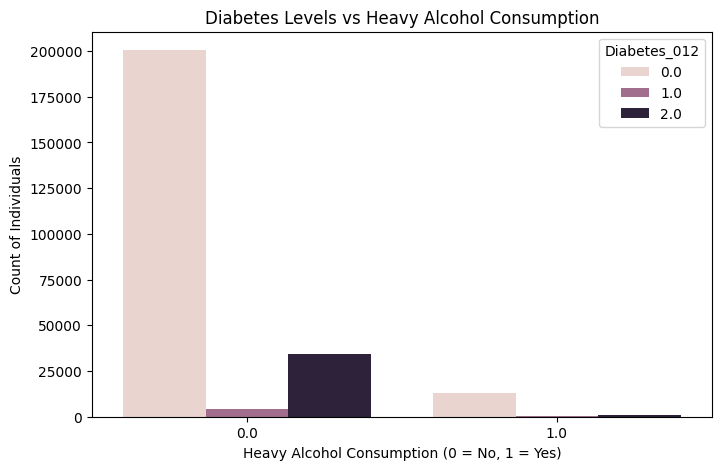

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='HvyAlcoholConsump', hue='Diabetes_012')

plt.title("Diabetes Levels vs Heavy Alcohol Consumption")
plt.xlabel("Heavy Alcohol Consumption (0 = No, 1 = Yes)")
plt.ylabel("Count of Individuals")

plt.legend(title="Diabetes_012")
plt.show()


C:\Users\maina\AppData\Local\Temp\ipykernel_15560\1295472236.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Fruits', 'Diabetes_012'])
C:\Users\maina\AppData\Local\Temp\ipykernel_15560\1295472236.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Veggies', 'Diabetes_012'])
C:\Users\maina\AppData\Local\Temp\ipykernel_15560\1295472236.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


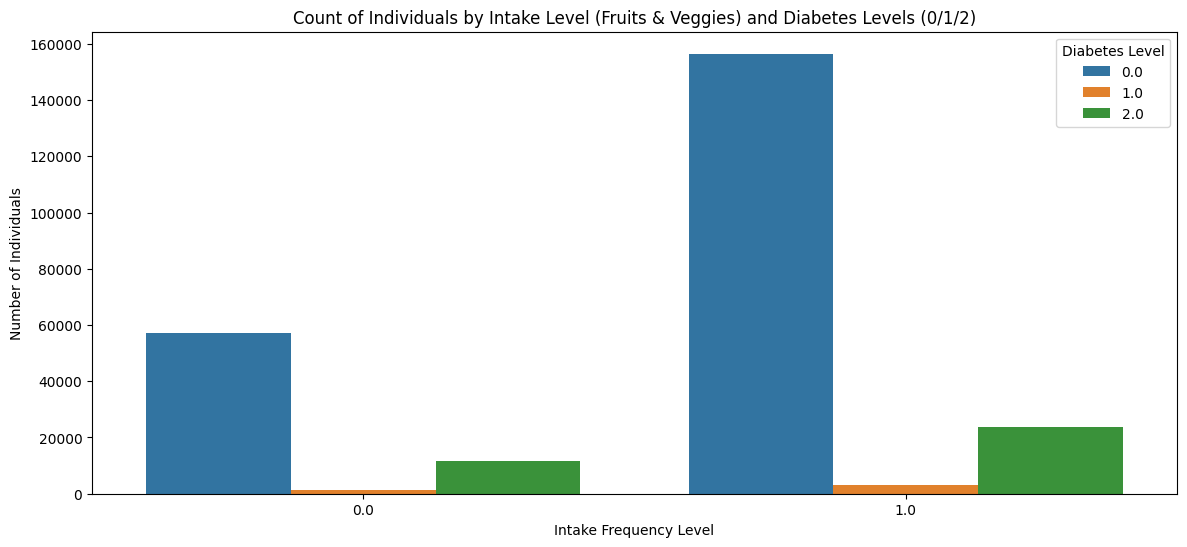

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Diabetes_012 is categorical with 3 levels 0/1/2
df['Diabetes_012'] = df['Diabetes_012'].astype('category')

# Count individuals for fruits
fruit_counts = (
    df.groupby(['Fruits', 'Diabetes_012'])
      .size()
      .reset_index(name='Count')
)
fruit_counts['Type'] = 'Fruits'
fruit_counts.rename(columns={'Fruits': 'Intake'}, inplace=True)

# Count individuals for veggies
veggie_counts = (
    df.groupby(['Veggies', 'Diabetes_012'])
      .size()
      .reset_index(name='Count')
)
veggie_counts['Type'] = 'Veggies'
veggie_counts.rename(columns={'Veggies': 'Intake'}, inplace=True)

# Combine both
combined_counts = pd.concat([fruit_counts, veggie_counts], ignore_index=True)

# Plot grouped bar chart by Diabetes Level (0,1,2)
plt.figure(figsize=(14,6))
sns.barplot(
    data=combined_counts,
    x='Intake',
    y='Count',
    hue='Diabetes_012',
    ci=None
)

plt.title("Count of Individuals by Intake Level (Fruits & Veggies) and Diabetes Levels (0/1/2)")
plt.xlabel("Intake Frequency Level")
plt.ylabel("Number of Individuals")
plt.legend(title="Diabetes Level")

plt.show()
